Accuracy: 100.00%


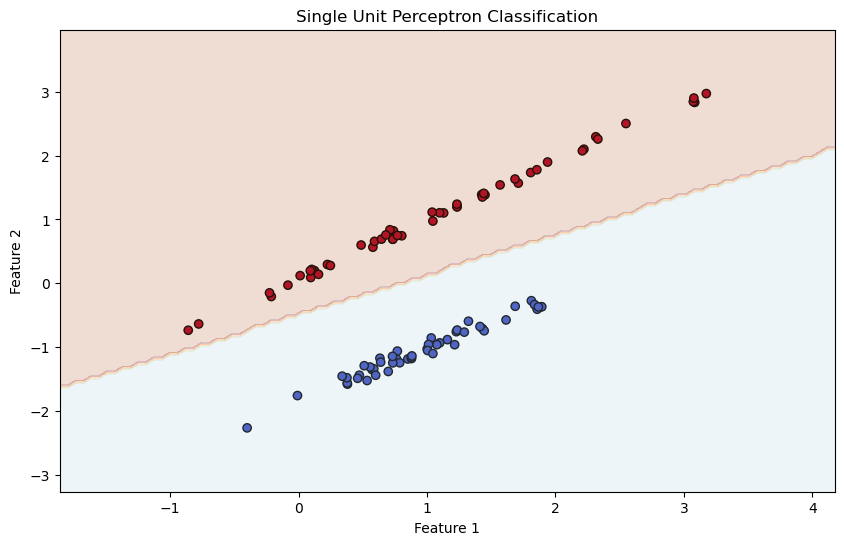

In [8]:
#2a
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate a classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Initialize and train the perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X, y)

# Calculate and print accuracy
y_pred = perceptron.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate grid for decision boundary visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
plt.title("Single Unit Perceptron Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


AND gate accuracy: 100.00%
Predictions: [0 0 0 1]
True Labels: [0 0 0 1]



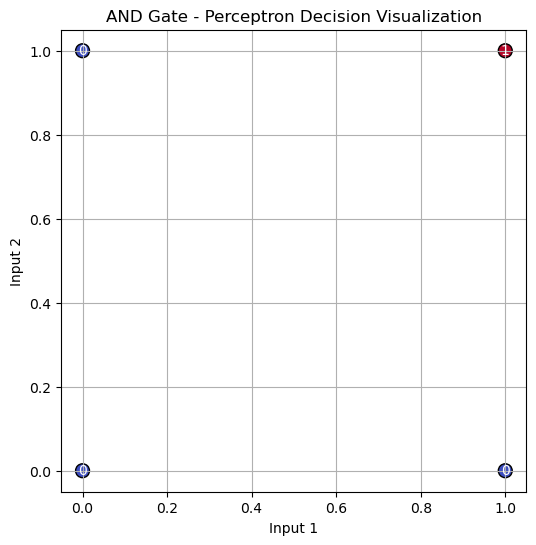

OR gate accuracy: 100.00%
Predictions: [0 1 1 1]
True Labels: [0 1 1 1]



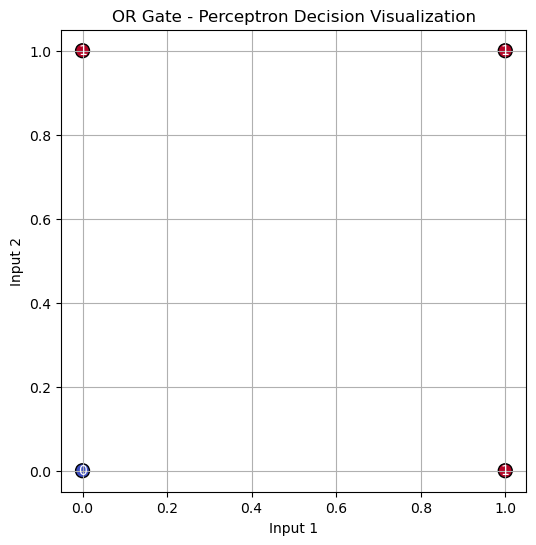

XOR gate accuracy: 50.00%
Predictions: [0 0 0 0]
True Labels: [0 1 1 0]



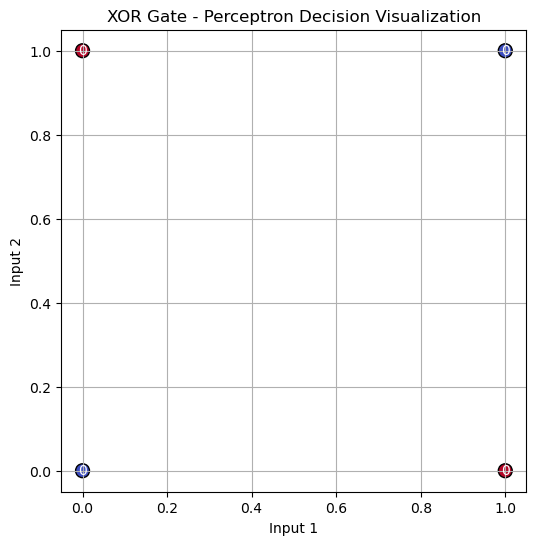

In [12]:
#2b
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Define datasets for logic gates
datasets = {
    "AND": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])),
    "OR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])),
    "XOR": (np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]))
}

# Train and evaluate perceptron for each gate
def evaluate_gate(name, X, y):
    perceptron = Perceptron(max_iter=1000, eta0=1, random_state=42).fit(X, y)
    predictions = perceptron.predict(X)
    accuracy = accuracy_score(y, predictions) * 100
    print(f"{name} gate accuracy: {accuracy:.2f}%\nPredictions: {predictions}\nTrue Labels: {y}\n")

    # Visualize the dataset and decision boundary
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
    for i, pred in enumerate(predictions):
        plt.text(X[i, 0], X[i, 1], str(pred), color='white', ha='center', va='center')
    plt.title(f"{name} Gate - Perceptron Decision Visualization")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)
    plt.show()

for name, (X, y) in datasets.items():
    evaluate_gate(name, X, y)
